# Homework 2: Gradient Descent (into madness)

<ol>
    <li>

Consider the three-hump Camel function used in class $$f(x1, x2) = 2x_1^2 − 1.05x^4_1 + \frac{1}{6}x^6_1 + x_1x_2 + x_2^2$$ Its gradient is $$\nabla f = [4x_1 − 4.2x^3_1 + x^5_1 + x_2, x_1 + 2x_2]^T$$ 

Do the following:
    </li>
        <ol type='a'>
            <li>
                Perform gradient descent with initial point $x_0 = (0.8, −0.5)$ and a variable learning rate $$x_t = x_{t-1} − \eta _{t−1} · \nabla f(x_{t−1}), t ≥ 1$$ where
                $$\eta _t = \beta · \eta _{t−1}, t ≥ 1, \eta _0 = 0.5$$
                Here, $0 < \beta < 1$ is the shrinking factor such that η is reduce exactly by half after every five
                iterations. Does gradient descent converge to some point in this case? If yes, where does it
                converge to?
            </li>
            <li>
                Select 100 distinct initial locations within the rectangular region $[−3, 3] × [−2, 2]$, which can
                be either a uniform grid over the region or a random set of points sampled from the region.
                For each choice of the initial point, perform gradient descent with the above variable learning
                rate schedule. How many of them converged, and where did they converge to? Display the
                100 points on top of the level set, color coded by which local minimum they converged to.
            </li>
            <li>
                In https://www.ceremade.dauphine.fr/~waldspurger/tds/22_23_s1/advanced_gradient_descent.pdf, 
                a variant of gradient descent, called heavy ball, is introduced (see Algorithm 2
                on page 7; the parameter α there is our $\eta$). Implement the heavy ball scheme on the above
                function with $x_0 = (0.8, −0.5), \alpha = 0.5$ and different values of the momentum parameter $\gamma$ = 0
                (no momentum), $0.1, 0.2, . . . , 0.9$ and $1$ (full momentum). Display a few typical trajectories of
                gradient descent. Which values of $\gamma$ led to convergence to the local minimum at (0, 0)?
            </li>
        </o1>

</ol>

#### (a). 

Perform gradient descent with initial point $x_0 = (0.8, −0.5)$ and a variable learning rate $$x_t = x_{t-1} − \eta _{t−1} · \nabla f(x_{t−1}), t ≥ 1$$ where
                $$\eta _t = \beta · \eta _{t−1}, t ≥ 1, \eta _0 = 0.5$$
                Here, $0 < \beta < 1$ is the shrinking factor such that η is reduce exactly by half after every five
                iterations. Does gradient descent converge to some point in this case? If yes, where does it
                converge to?

In [52]:
# Imports
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import warnings

In [66]:
import numpy as np

def gradient_descent(x1, x2, eta, k):
    # Threshold to prevent overflow
    threshold = 1e10
    # Epsilon to prevent numerical instability
    epsilon = 1e-10

    z = 2*x1**2 - 1.05*x1**4 + x1**6/6 + x1*x2 + x2**2

    # recording x1, x2, f values
    x1vals = np.array([x1])
    x2vals = np.array([x2])
    fvals = np.array([z])

    for i in range(k):
        # updating x1, x2 simultaneously using the gradient at previous point (x1, x2)
        grad_x1 = 4*x1 - 4.2*x1**3 + x1**5 + x2
        grad_x2 = x1 + 2*x2
        
        # Check for small gradients and add epsilon
        grad_x1 = grad_x1 if np.abs(grad_x1) > epsilon else np.sign(grad_x1) * epsilon
        grad_x2 = grad_x2 if np.abs(grad_x2) > epsilon else np.sign(grad_x2) * epsilon
        
        x1, x2 = x1 - eta * grad_x1, x2 - eta * grad_x2
        
        # Check for overflow and limit values
        if np.abs(x1) > threshold or np.abs(x2) > threshold:
            x1 = np.sign(x1) * threshold
            x2 = np.sign(x2) * threshold
        
        x1vals = np.append(x1vals, x1)
        x2vals = np.append(x2vals, x2)
        
        # recording the function value at the new point
        z = np.float64(2*x1**2 - 1.05*x1**4 + x1**6/6 + x1*x2 + x2**2)
        fvals = np.append(fvals, z)

    return x1vals, x2vals, fvals

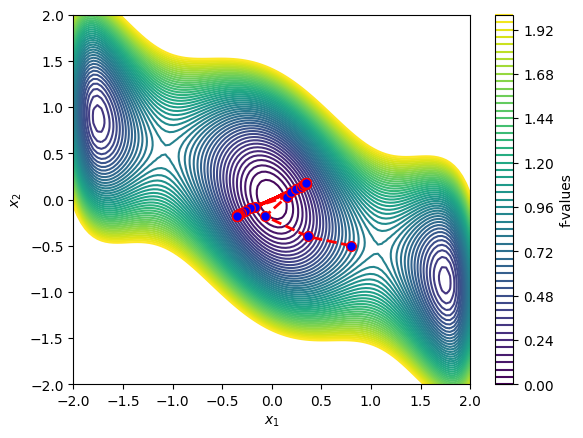

In [67]:
# choose a new, localized grid around the target point to zoom in
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y) 
Z = 2*X**2 - 1.05*X**4 + X**6/6 + X*Y + Y**2

levels = np.linspace(0, 2, 51)

contour = plt.contour(X, Y, Z,levels = levels)
plt.colorbar(contour, label='f-values')

x1vals, x2vals, fvals = gradient_descent(x1=0.8, x2=-0.5, eta=0.5, k=30)

plt.plot(x1vals, x2vals, color='red',linestyle='dashed',linewidth =2,
         marker='o', markerfacecolor='blue', markersize=7)

# Adding labels
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

# Displaying the plot
plt.show()

#### (b).

Select 100 distinct initial locations within the rectangular region $[−3, 3] × [−2, 2]$, which can
be either a uniform grid over the region or a random set of points sampled from the region.
For each choice of the initial point, perform gradient descent with the above variable learning
rate schedule. How many of them converged, and where did they converge to? Display the
100 points on top of the level set, color coded by which local minimum they converged to.

[0.3501827417868211, -0.3501487530365793, 0.35018294427229035, -0.35015413528275885, -0.3501802300058549, 0.35013400823452456, -0.35017855836284373, nan, nan, -0.3501665021228684, nan, 0.2292139888397376, 0.35018250131620154, nan, nan, nan, nan, -0.35012711706075555, 0.35004043560427234, nan, nan, nan, 0.3501734870534471, -0.32268557001316167, nan, 0.3501801322121203, nan, nan, 0.3501827460352902, -0.35018269459183715, 0.350181042411419, -0.35015913947872357, 0.35015978042059503, -0.35007997307118655, nan, 0.3501827663087611, 0.3501827913083836, 0.3501830424165966, nan, -0.3501568047688641, 0.35015934818781036, -0.35018296267370064, -0.3501093479634407, nan, 0.3501809405088034, -0.34937047868951054, -0.35014817887795396, nan, 0.35010739785272327, nan, -0.35018117653883596, 0.3501814969088357, nan, nan, -0.3501507918330754, -0.34946821172590853, 0.3501828635768224, 0.350169251197107, -0.3501827136884973, 0.35016111433710967, -0.3501461497961626, nan, 0.35018061808547385, nan, nan, -0.35

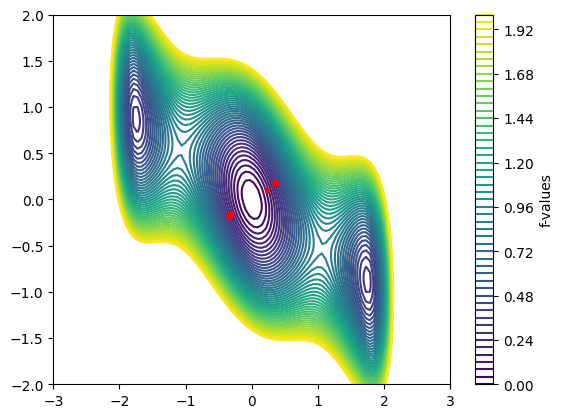

In [68]:
# Suppress UserWarning
warnings.filterwarnings("ignore")

# choose a new, localized grid around the target point to zoom in
x = np.linspace(-3, 3, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = 2*X**2 - 1.05*X**4 + X**6/6 + X*Y + Y**2

levels = np.linspace(0, 2, 51)

contour = plt.contour(X, Y, Z,levels = levels)
plt.colorbar(contour, label='f-values')

# Select 100 distinct initial locations within the rectangular region [−3, 3] × [−2, 2]
np.random.seed(0)
x1 = np.random.uniform(-3, 3, 100)
x2 = np.random.uniform(-2, 2, 100)

# recording the final x1, x2 values
x1final = []
x2final = []

for i in range(100):
    x1vals, x2vals, fvals = gradient_descent(x1[i], x2[i], eta=0.5, k=30)
    x1final.append(x1vals[-1])
    x2final.append(x2vals[-1])

    # plot the 100 points on top of the level set, color coded by which local minimum they converged to
    # plt.plot(x1vals[-1], x2vals[-1], color='red', marker='o', markersize=3)

    # if fvals[-1] < 0.1:
    #     plt.plot(x1vals[i], x2vals[i], 'o', color='blue', markersize=3)
    # else:
    #     plt.plot(x1vals[i], x2vals[i], 'o', color='red', markersize=3)

    # if fvals[-1] >= 1.5:
    #     plt.plot(x1vals[-1], x2vals[-1], color='blue', marker='o', markersize=3)
    # elif abs(fvals[-1]) < 1.5 and abs(x1vals[-1]) >= 0.5:
    #     plt.plot(x1vals[-1], x2vals[-1], color='orange', marker='o', markersize=3)
    # elif abs(fvals[-1]) < 0.5:
    #     plt.plot(x1vals[-1], x2vals[-1], color='green', marker='o', markersize=3)
    # else:
    #     plt.plot(x1vals[-1], x2vals[-1], color='purple', marker='o', markersize=3)

#plot x1final, x2final as circles with no lines over the contour plot to show the final points
x1final = [float(i) for i in x1final]
x2final = [float(i) for i in x2final]

print(x1final)
print(x2final)
plt.plot(x1final, x2final, 'o', color='red', markersize=3)


In [57]:
x1final = [float(i) for i in x1final]

In [58]:
x1vals

array([-2.97182714e+00,  6.38865865e+01, -5.31583317e+08,  2.12239746e+43,
       -1.00000000e+60,  1.00000000e+60, -1.00000000e+60,  1.00000000e+60,
       -1.00000000e+60,  1.00000000e+60, -1.00000000e+60,  1.00000000e+60,
       -1.00000000e+60,  1.00000000e+60, -1.00000000e+60,  1.00000000e+60,
       -1.00000000e+60,  1.00000000e+60, -1.00000000e+60,  1.00000000e+60,
       -1.00000000e+60,  1.00000000e+60, -1.00000000e+60,  1.00000000e+60,
       -1.00000000e+60,  1.00000000e+60, -1.00000000e+60,  1.00000000e+60,
       -1.00000000e+60,  1.00000000e+60, -1.00000000e+60,  1.00000000e+60,
       -1.00000000e+60,  1.00000000e+60, -1.00000000e+60,  1.00000000e+60,
       -1.00000000e+60,  1.00000000e+60, -1.00000000e+60,  1.00000000e+60,
       -1.00000000e+60,  1.00000000e+60, -1.00000000e+60,  1.00000000e+60,
       -1.00000000e+60,  1.00000000e+60, -1.00000000e+60,  1.00000000e+60,
       -1.00000000e+60,  1.00000000e+60, -1.00000000e+60,  1.00000000e+60,
       -1.00000000e+60,  

#### (c).

In https://www.ceremade.dauphine.fr/~waldspurger/tds/22_23_s1/advanced_gradient_descent.pdf, 
                a variant of gradient descent, called heavy ball, is introduced (see Algorithm 2
                on page 7; the parameter α there is our $\eta$). Implement the heavy ball scheme on the above
                function with $x_0 = (0.8, −0.5), \alpha = 0.5$ and different values of the momentum parameter $\gamma$ = 0
                (no momentum), $0.1, 0.2, . . . , 0.9$ and $1$ (full momentum). Display a few typical trajectories of
                gradient descent. Which values of $\gamma$ led to convergence to the local minimum at (0, 0)?

<ol start=2>
    <li>
    
Use the following code to simulate a linear system of $n$ equations with $m$ unknowns:

$n = 20$<br>
$m = 10$<br>
$A = np.random.normal(0, 1, size = (n, m))$<br>
$x\_true = np.random.normal(0, 1, size = (m, 1))$<br>
$b = A.dot(x\_true) + np.random.normal(0, 0.1, size = (n, 1))$<br>
Consider the corresponding least squares problem
$$\underset{x}{min}\frac{1}{n}\lvert\lvert Ax-b \rvert\rvert^2$$
Here, a factor of $\frac{1}{n}$ is incorporated to the objective function. It does not change the minimizer but
will help control the magnitude of the gradient.

Solve the above problem using two different methods:
    </li>
        <ol type="a">
            <li>
                The analytical method, by solving the linear system $(A^T A)x = A^Tb$;
            </li>
            <li>
                Gradient descent (with proper values of the learning rate and number of iterations ). Plot the x-convergence curve.
            </li>
        </ol>
        
Do the two methods give you (nearly) the same solution?
</ol>

<ol start=3>
    <li>
    
Repeat part (b) with the following values of $n = 200, 400, 600, 800, 1000, 2000, 4000, 6000, 8000, 10000$
        and $m = \frac{n}{2}$ (for each fixed value of $n$). Use the code below to record and then plot the running
        times for both of the methods (exact or gradient descent) against $n$. You may want to use log scale
        for one or both quantities (running time, $n$).
        <br><br>$\text{import time}$<br>
        $\text{start time = time.time()}$<br> 
        $\text{\#Steps used by the exact method or gradient descent}$<br>
        $\text{runtime = time.time() - start time}$<br>
    </li>
</ol>

